In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling.models import BlackBody
from astropy import units as u
from astropy import constants as const

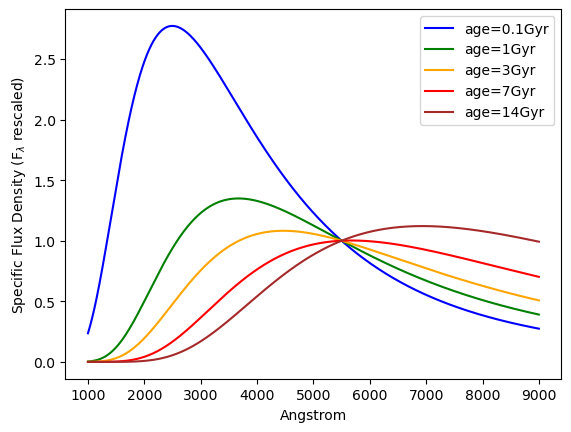

In [2]:
plt.figure()
# set global parameters:
temp_sun = 5780.0

# initialize wavelength array
wav = np.arange(1000, 9000) * u.AA

# build mass range (linear)
minmass = 0.1 # linear
maxmass = 100
nbins = 1000 # it is important to have a large number of bins for a proper sampling
             # if using linear range
dm = (maxmass- minmass)/nbins
massbins = np.linspace(minmass, maxmass, num=nbins)

# simple stellar population model
def SSP(wav , SSP_age):
    # initialize totflux array (same units as "BlackBody with flux scaled to 0")
    b0 = BlackBody (temperature=1000*u.K, scale=0. * u.erg / (u.cm ** 2 * u.AA * u.s * u.sr )) # bolometric lum
    totflux=b0(wav)
    #loop over masses
    for mass in massbins:
        L = mass**3.5
        age = mass / L*10. # Gyr
        if SSP_age<=age:
            if mass<2 : n = 4
            else : n = 18
            r = mass**((n-1)/(n+3))
            T = (L/(r**2))**(1/4)*temp_sun
            nstars = mass**(-2.35) # Salpeter IMF
            #get bb spectrum (per unit AA) at this temperature, to be renormalized to the bolometric value
            bb = BlackBody(temperature=T*u.K, scale=1. * u.erg / (u.cm ** 2 * u.AA * u.s * u.sr))
            flux= nstars*L*(bb(wav)/bb.bolometric_flux.value)
            #print(mass, np.log10(L), np.log10(bb.bolometric_flux.value))
            totflux = totflux + flux
    return totflux

# plot a given SED
def plotSSP(wav, SSP_age, normwav=5500*u.AA, lstyle="-" , col="blue"):
    totflux = SSP (wav, SSP_age)
    # normalize at 5500AA
    totflux_norm = totflux/ totflux [wav== normwav]
    # plot SED
    plt.plot(wav, totflux_norm, label="age="+str(SSP_age) +"Gyr", linestyle=lstyle, color=col)
    return

# plot various SEDs
plotSSP(wav, SSP_age=0.1, col="blue")
plotSSP(wav, SSP_age=1, col="green")
plotSSP(wav, SSP_age=3, col="orange")
plotSSP(wav, SSP_age=7, col="red")
plotSSP(wav, SSP_age=14, col="brown")

plt.xlabel( "Angstrom" )
plt.ylabel( "Specific Flux Density (F$_{\lambda}$ rescaled)" )
plt.legend (loc="upper right" )
plt.show()